# Connect to your google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change your system path
import os
os.chdir('./drive/MyDrive/Colab Notebooks')

# Read data from your google drive

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/WISDM_ar_v1.1_transformed.arff
./dataset/WISDM_ar_v1.1_raw_about.txt
./dataset/WISDM_ar_v1.1_raw.txt
./dataset/WISDM_ar_v1.1_trans_about.txt
./dataset/readme.txt
./dataset/res.txt


In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.0


In [6]:
from scipy import stats
import numpy as np

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Data Cleaning & Preprocessing
drop null values.

change datatype of the ‘z-axis’ column to float.

drop the rows where the timestamp = 0.

sort data in ascending order of ‘user’ and ‘timestamp’ columns.

In [28]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df_har = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/our_dataset.txt', header = None, names = columns)
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user38.txt', header = None, names = columns)
df_har

,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Downstairs,0,-0.144,-0.945,+0.271;
1,37,Downstairs,125000000,-0.132,-0.907,+0.363;
2,37,Downstairs,250000000,-0.104,-0.924,+0.358;
3,37,Downstairs,375000000,-0.021,-0.927,+0.406;
4,37,Downstairs,500000000,-0.130,-0.873,+0.322;
...,...,...,...,...,...,...
19351,41,Sitting,251750000000,-0.034,0.036,+0.975;
19352,41,Sitting,251875000000,-0.039,0.042,+0.969;
19353,41,Sitting,252000000000,-0.041,0.038,+0.970;
19354,41,Sitting,252125000000,-0.042,0.037,+0.970;


In [19]:
test_df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,38,Walking,0,-0.287,0.634,-0.451;
1,38,Walking,125000000,-0.201,0.944,-0.674;
2,38,Walking,250000000,-0.251,0.835,-0.671;
3,38,Walking,375000000,-0.075,1.401,+0.199;
4,38,Walking,500000000,-0.232,0.408,+0.315;
...,...,...,...,...,...,...
4034,40,Standing,91750000000,0.095,-0.949,+0.063;
4035,40,Standing,91875000000,-0.030,-1.087,-0.046;
4036,40,Standing,92000000000,-0.011,-1.098,-0.045;
4037,40,Standing,92125000000,0.015,-0.965,+0.105;


In [29]:
# removing null values
df_har = df_har.dropna()
print(df_har.shape)
# transforming the z-axis to float
df_har['z-axis'] = df_har['z-axis'].str.replace(';', '')
df_har['z-axis'] = df_har['z-axis'].apply(lambda x:float(x))
# drop rows where timestamp is 0
df = df_har[df_har['timestamp'] != 0]
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)
df

(19356, 6)


,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Downstairs,125000000,-0.132,-0.907,0.363
1,37,Upstairs,125000000,-0.375,-0.395,0.841
2,37,Jogging,125000000,-0.162,-1.364,-0.043
3,37,Sitting,125000000,-0.100,-0.089,0.951
4,37,Standing,125000000,-0.044,-1.006,-0.191
...,...,...,...,...,...,...
19339,42,Jogging,186375000000,-0.012,-1.400,0.108
19340,42,Jogging,186500000000,-0.412,-0.849,0.158
19341,42,Jogging,186625000000,-0.050,-1.025,0.057
19342,42,Jogging,186750000000,-0.168,-1.020,0.115


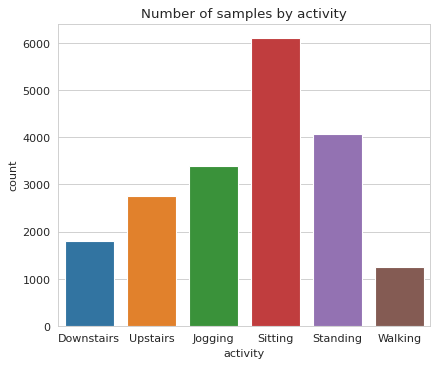

Sitting       6107
Standing      4066
Jogging       3387
Upstairs      2747
Downstairs    1795
Walking       1242
Name: activity, dtype: int64

In [30]:
figure(figsize=(6, 5), dpi=80)
sns.set_style('whitegrid')
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()
df['activity'].value_counts()

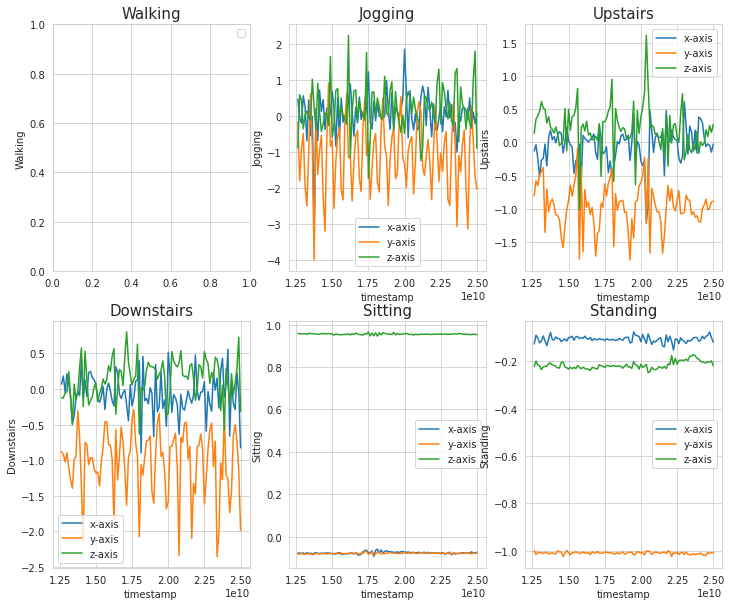

In [31]:
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data36=df[(df['user']==37)&(df['activity']==i)][100:200]
  sns.lineplot(y='x-axis',x='timestamp',data=data36)
  sns.lineplot(y='y-axis',x='timestamp',data=data36)
  sns.lineplot(y='z-axis',x='timestamp',data=data36)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
  #plt.savefig(i+'.png')
  
  #plt.show()
plt.show()

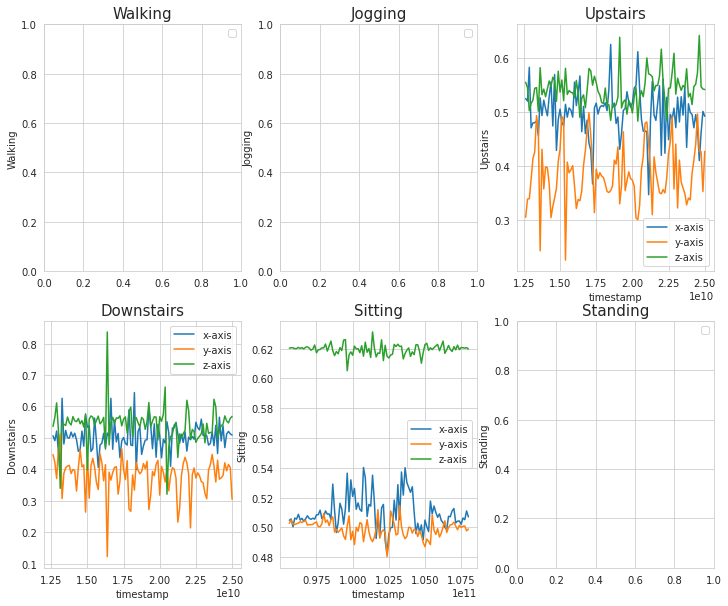

In [32]:
# copy the data
df_max_scaled = df.copy()
# apply normalization techniques
for ind in df_max_scaled.columns:
  if ind == 'x-axis' or ind == 'y-axis' or ind == 'z-axis':
    df_max_scaled[ind] = (df_max_scaled[ind] + 4) / 8
# indicate 
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data36=df_max_scaled[(df_max_scaled['user']==41)&(df_max_scaled['activity']==i)][100:200]
  sns.lineplot(y='x-axis',x='timestamp',data=data36)
  sns.lineplot(y='y-axis',x='timestamp',data=data36)
  sns.lineplot(y='z-axis',x='timestamp',data=data36)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
#plt.savefig(i+'.png')
  #plt.show()
plt.show()

In [33]:
random_seed = 42   
n_time_steps = 50
n_features = 3 
step = 10         
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015

In [34]:
segments = []
labels = []
#數據會有些重疊
window_len = 50
check = []

flag = False
for i in range(0,  df_max_scaled.shape[0]- window_len, 10):  
        
    if df_max_scaled['activity'][i] == df_max_scaled['activity'][i+window_len]:
        flag = True
        for j in range(0,window_len):

            xs = df_max_scaled['x-axis'].values[i+j]  

            ys = df_max_scaled['y-axis'].values[i+j]

            zs = df_max_scaled['z-axis'].values[i+j]

            segments.append([xs, ys, zs])
    else:
        flag = False
    if flag == True:
        label = stats.mode(df_max_scaled['activity'][i: i + window_len])[0][0]

        #segments.append([xs, ys, zs])
        check.append(label)
        labels.append(label)
print( np.asarray(segments, dtype= np.float32).shape)
#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, window_len, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

(64900, 3)


In [35]:
class_label =['Downstairs','Jogging',"Sitting","Standing",'Upstairs','Walking']
for act in class_label:
    for index,i in enumerate(check):
        if i == act:
          print (labels[index],check[index])
          break

[1. 0. 0. 0. 0. 0.] Downstairs
[0. 1. 0. 0. 0. 0.] Jogging
[0. 0. 1. 0. 0. 0.] Sitting
[0. 0. 0. 1. 0. 0.] Standing
[0. 0. 0. 0. 1. 0.] Upstairs
[0. 0. 0. 0. 0. 1.] Walking


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = 42)

In [37]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],X_val.shape[2],1))

In [38]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1038, 50, 3, 1), (260, 50, 3, 1), (1038, 6), (260, 6))

In [39]:
X_train[0].shape

(50, 3, 1)

# Test Dataset

In [19]:
# removing null values
test_df = test_df.dropna()
print(test_df.shape)
# transforming the z-axis to float
test_df['z-axis'] = test_df['z-axis'].str.replace(';', '')
test_df['z-axis'] = test_df['z-axis'].apply(lambda x:float(x))
# drop rows where timestamp is 0
tdf = test_df[test_df['timestamp'] != 0]
# arrange data in ascending order of user and timestamp
tdf = tdf.sort_values(by = ['user', 'timestamp'], ignore_index=True)
tdf

(4039, 6)


,user,activity,timestamp,x-axis,y-axis,z-axis
0,37,Sitting,125000000,-0.391,0.741,-0.524
1,37,Standing,125000000,-0.998,-0.114,0.063
2,37,Jogging,125000000,-1.012,-0.040,0.203
3,37,Sitting,250000000,-0.403,0.749,-0.526
4,37,Standing,250000000,-0.998,-0.105,0.065
...,...,...,...,...,...,...
4023,40,Standing,91750000000,0.095,-0.949,0.063
4024,40,Standing,91875000000,-0.030,-1.087,-0.046
4025,40,Standing,92000000000,-0.011,-1.098,-0.045
4026,40,Standing,92125000000,0.015,-0.965,0.105


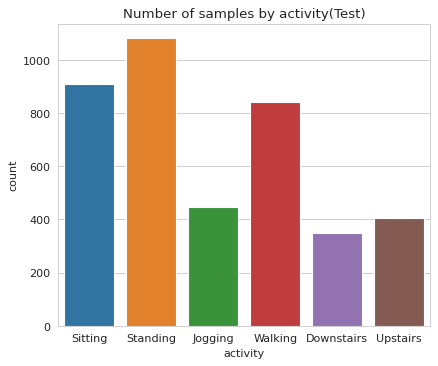

Standing      1081
Sitting        908
Walking        842
Jogging        446
Upstairs       404
Downstairs     347
Name: activity, dtype: int64

In [ ]:
figure(figsize=(6, 5), dpi=80)
sns.set_style('whitegrid')
sns.countplot(x = 'activity', data = tdf)
plt.title('Number of samples by activity(Test)')
plt.show()
tdf['activity'].value_counts()

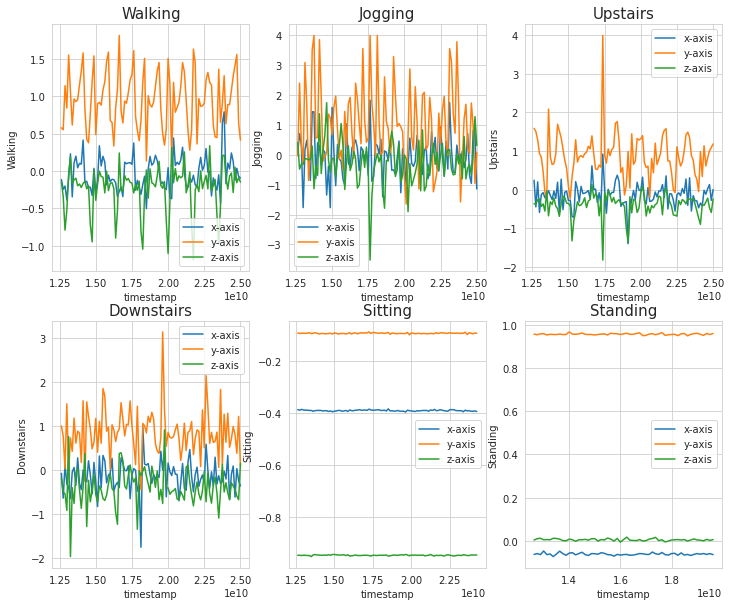

In [ ]:
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data38=tdf[(tdf['user']==38)&(tdf['activity']==i)][100:200]
  sns.lineplot(y='x-axis',x='timestamp',data=data38)
  sns.lineplot(y='y-axis',x='timestamp',data=data38)
  sns.lineplot(y='z-axis',x='timestamp',data=data38)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
  #plt.savefig(i+'.png')
  
  #plt.show()
plt.show()

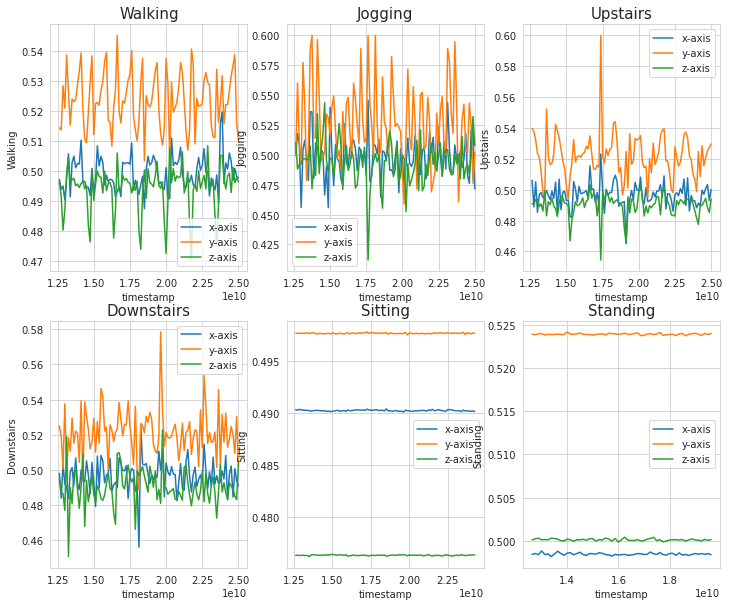

In [51]:
activities=['Walking','Jogging','Upstairs','Downstairs','Sitting','Standing']
# copy the data
tdf_max_scaled = tdf.copy()
# apply normalization techniques
for ind in tdf_max_scaled.columns:
  if ind == 'x-axis' or ind == 'y-axis' or ind == 'z-axis':
    tdf_max_scaled[ind] = (tdf_max_scaled[ind] + 20) / 40

plt.figure(figsize=(12, 10))
for index,i in enumerate(activities):
  plt.subplot(2,3,index+1)
  data38=tdf_max_scaled[(tdf_max_scaled['user']==38)&(tdf_max_scaled['activity']==i)][100:200]
  sns.lineplot(y='x-axis',x='timestamp',data=data38)
  sns.lineplot(y='y-axis',x='timestamp',data=data38)
  sns.lineplot(y='z-axis',x='timestamp',data=data38)
  plt.legend(['x-axis','y-axis','z-axis'])
  plt.ylabel(i)
  plt.title(i,fontsize=15)
#plt.savefig(i+'.png')
  #plt.show()
plt.show()

In [ ]:
test_segments = []
test_labels = []
window_len = 50
test_check = []

flag = False
for i in range(0, tdf_max_scaled.shape[0]- window_len, 10):  
        
    if tdf_max_scaled['activity'][i] == tdf_max_scaled['activity'][i+window_len]:
        flag = True
        for j in range(0,window_len):

            xs = tdf_max_scaled['x-axis'].values[i+j]  

            ys = tdf_max_scaled['y-axis'].values[i+j]

            zs = tdf_max_scaled['z-axis'].values[i+j]

            test_segments.append([xs, ys, zs])
    else:
        flag = False
    if flag == True:
        test_label = stats.mode(tdf_max_scaled['activity'][i: i + window_len])[0][0]

        test_check.append(test_label)
        test_labels.append(test_label)
print(np.asarray(test_segments, dtype= np.float32).shape)

test_reshaped_segments = np.asarray(test_segments, dtype= np.float32).reshape(-1, window_len, n_features)

test_labels = np.asarray(pd.get_dummies(test_labels), dtype = np.float32)

(8950, 3)


In [ ]:
class_label =['Downstairs','Jogging',"Sitting","Standing",'Upstairs','Walking']
for act in class_label:
    for index,i in enumerate(test_check):
        if i == act:
          print (test_labels[index],test_check[index])
          break

[1. 0. 0. 0. 0.] Downstairs
[0. 1. 0. 0. 0.] Sitting
[0. 0. 1. 0. 0.] Standing
[0. 0. 0. 1. 0.] Upstairs
[0. 0. 0. 0. 1.] Walking


In [ ]:
X_test, y_test = test_reshaped_segments, test_labels

In [ ]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [ ]:
X_test.shape

(4658, 50, 3, 1)

# Train model in Python

In [40]:
# model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPooling2D,Reshape,Conv1D,MaxPooling1D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import keras
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from keras.models import load_model

In [41]:
class HalNet(tf.keras.Model):
    def __init__(self):
        super(HalNet, self).__init__()
        self.model = Sequential()
        self.model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
        self.model.add(Dropout(0.1))

        self.model.add(Conv2D(32, (2, 2), activation='relu'))
        self.model.add(Dropout(0.2))

        self.model.add(Flatten())

        self.model.add(Dense(64, activation = 'relu'))
        self.model.add(Dropout(0.5))

        self.model.add(Dense(6, activation='softmax'))

        self.model.summary()

    def call(self, inputs):

        out = self.model(inputs)
        
        return out

In [42]:
model = HalNet()
model.build((None,50,3,1))
model.compile(optimizer="Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 2, 16)         80        
                                                                 
 dropout (Dropout)           (None, 49, 2, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 1, 32)         2080      
                                                                 
 dropout_1 (Dropout)         (None, 48, 1, 32)         0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

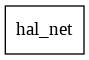

In [43]:
plot_model(model, to_file='model_plot.png', show_shapes=True)

In [44]:
history = model.fit(X_train, y_train,batch_size=16 ,epochs = 40, validation_data= (X_val, y_val), verbose=1)

Epoch 1/40
65/65 [==============================] - 14s 8ms/step - loss: 1.4000 - accuracy: 0.4114 - val_loss: 1.2095 - val_accuracy: 0.7692
Epoch 2/40
65/65 [==============================] - 0s 4ms/step - loss: 1.0948 - accuracy: 0.6146 - val_loss: 0.8309 - val_accuracy: 0.7654
Epoch 3/40
65/65 [==============================] - 0s 4ms/step - loss: 0.7658 - accuracy: 0.7225 - val_loss: 0.5390 - val_accuracy: 0.7692
Epoch 4/40
65/65 [==============================] - 0s 4ms/step - loss: 0.6184 - accuracy: 0.7428 - val_loss: 0.4899 - val_accuracy: 0.7962
Epoch 5/40
65/65 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7630 - val_loss: 0.4377 - val_accuracy: 0.8346
Epoch 6/40
65/65 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7794 - val_loss: 0.4210 - val_accuracy: 0.8615
Epoch 7/40
65/65 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.7900 - val_loss: 0.4083 - val_accuracy: 0.8577
Epoch 8/40
65/65 [=

In [45]:
loss, accuracy = model.evaluate(X_val, y_val, batch_size = batch_size, verbose = 1)
print("Val Accuracy :", accuracy)
print("Val Loss :", loss)

1/1 [==============================] - 0s 88ms/step - loss: 0.0832 - accuracy: 0.9692
Val Accuracy : 0.9692307710647583
Val Loss : 0.08321801573038101


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", test_accuracy)
print("Test Loss :", test_loss)

5/5 [==============================] - 0s 6ms/step - loss: 1.4600 - accuracy: 0.6368
Test Accuracy : 0.6367539763450623
Test Loss : 1.4599957466125488


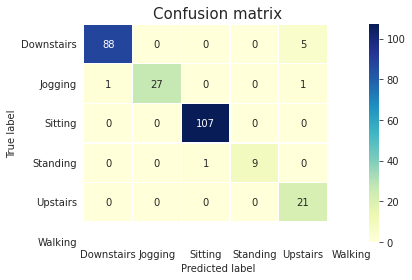

In [46]:
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, f1_score
from pylab import savefig
predictions = model.predict(X_val)
class_labels =  ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
max_val = np.argmax(y_val, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_val, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

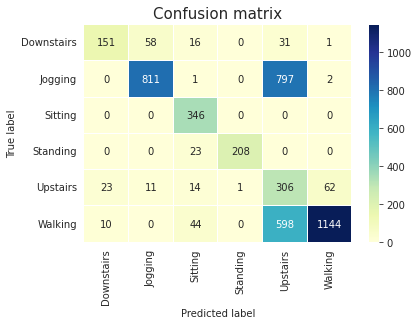

In [ ]:
test_predictions = model.predict(X_test)
class_labels =  ['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']
max_test_val = np.argmax(y_test, axis=1)
max_test_predictions = np.argmax(test_predictions, axis=1)
test_confusion_matrix = metrics.confusion_matrix(max_test_val, max_test_predictions)
sns.heatmap(test_confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
y_pred = predictions
np.argmax(y_val[0]),np.argmax(y_pred[0]),np.argmax(y_val, axis=1),np.argmax(y_pred, axis=1)

(1, 1, array([1, 3, 2, 2, 3, 2, 5, 5, 5, 1, 2, 2, 2, 5, 1, 2, 5, 2, 3, 2, 5, 3,
        5, 3, 5, 0, 5, 2, 2, 1, 1, 2, 5, 2, 2, 1, 2, 2, 1, 3, 1, 2, 5, 5,
        2, 5, 2, 2, 2, 3, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
        3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 5, 2, 2, 2, 2, 3, 3, 1, 2,
        2, 0, 2, 2, 2, 5, 2, 2, 5, 1, 5, 2, 1, 1, 5, 2, 2, 2, 5, 2, 1, 2,
        2, 2, 1, 5, 3, 2, 2, 1, 2, 2, 3, 1, 2, 3, 2, 1, 1, 5, 2, 2, 3, 3,
        2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 5, 2, 2, 5, 3, 1, 2, 2, 2, 3, 3, 2,
        2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 5, 3, 2, 1, 2, 2,
        2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5,
        2, 2, 2, 3, 3, 2, 3, 0, 1, 0, 1, 2, 2, 5, 3, 0, 2, 2, 2, 3, 2, 2,
        2, 2, 5, 1, 5, 0, 2, 5, 3, 2, 2, 5, 2, 2, 2, 1, 2, 5, 2, 5, 5, 2,
        3, 5, 5, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 3, 2,
        5, 2, 2, 0, 2, 5, 5, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 1, 1, 5]), array([1, 3, 2, 2, 3, 2, 5, 5, 5, 5,

In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix((np.argmax(y_val, axis=1)), (np.argmax(y_pred, axis=1)))
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score((np.argmax(y_val, axis=1)), (np.argmax(y_pred, axis=1)))))

print('Micro Precision: {:.2f}'.format(precision_score((np.argmax(y_val, axis=1)), (np.argmax(y_pred, axis=1)), average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score((np.argmax(y_val, axis=1)), (np.argmax(y_pred, axis=1)), average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score((np.argmax(y_val, axis=1)), (np.argmax(y_pred, axis=1)), average='micro')))

Confusion Matrix

[[1421   16    1    3  372  136]
 [   9 6356    0    0   48   41]
 [   0    0 1134    4    2    0]
 [   0    0    1  948    1    0]
 [  88   56    4   10 2086  128]
 [  23    1    0    0   95 8330]]

Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95



In [45]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report((np.argmax(y_val, axis=1)), (np.argmax(y_pred, axis=1)), target_names=['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking']))


Classification Report



ValueError: ignored

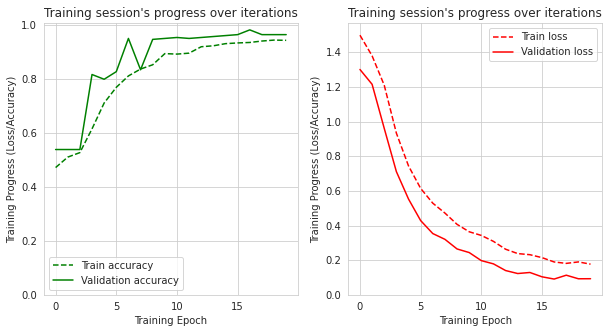

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.subplot(1,2,2)
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [47]:
 model.save_weights('my_model.h5')

# Convert to tf_lite

In [49]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
converter.inference_input_type, converter.inference_output_type

INFO:tensorflow:Assets written to: /tmp/tmp_pxgxeoy/assets


(tf.float32, tf.float32)

In [50]:
import pathlib


generated_dir = pathlib.Path("generated/")
generated_dir.mkdir(exist_ok=True, parents=True)
converted_model_file = generated_dir/"model.tflite"
converted_model_file.write_bytes(tflite_model)  

406408